<a href="https://colab.research.google.com/github/asifsmtp1/quantum-svm/blob/main/iris_qsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade qiskit==0.19.1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging

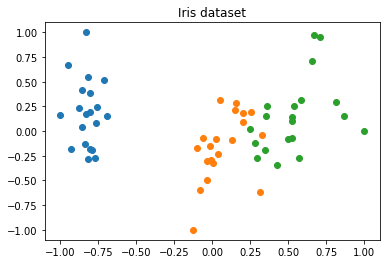

In [3]:
sample_Total, training_input, test_input, class_labels = iris(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
)

In [4]:
type(training_input)
training_input

{'A': array([[-0.71211036,  0.52027973],
        [-0.69019091,  0.15274702],
        [-0.8174161 , -0.27852344],
        [-0.7603726 ,  0.24192863],
        [-0.80617522, -0.18128913],
        [-0.85829177,  0.41654031],
        [-0.83273819, -0.13216301],
        [-0.76233108,  0.08482331],
        [-0.76854023, -0.27205974],
        [-0.79163565, -0.19464096],
        [-1.        ,  0.1659108 ],
        [-0.83150192,  1.        ],
        [-0.85270149,  0.04413292],
        [-0.9275267 , -0.18509205],
        [-0.8009166 ,  0.19164793],
        [-0.87361532,  0.23648286],
        [-0.94748622,  0.66596385],
        [-0.81366512,  0.54964416],
        [-0.80013263,  0.38505721],
        [-0.83251277,  0.17400492]]), 'B': array([[ 0.13035346, -0.09108897],
        [ 0.32479566, -0.03541634],
        [-0.0991516 , -0.17077307],
        [ 0.31433496, -0.61400133],
        [-0.00883773, -0.2973718 ],
        [ 0.15730988,  0.28290743],
        [-0.03405964, -0.49401293],
        [ 0.03959

In [5]:
class_labels

['A', 'B', 'C']

In [7]:
feature_dim=2

In [8]:
from qiskit.aqua.components.multiclass_extensions import AllPairs
seed = 10598

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')

qsvm = QSVM(feature_map, training_input, test_input,multiclass_extension = AllPairs())

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  1.0


In [9]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright